In [ ]:
import ROOT                                                                                                                                                                                                                                   
import math                                                                                                                                                                                                                                   
                                                                                                                                                                                                                                              
  # 1. Create a 2D histogram grid for atoms (even-even will be filled)                                                                                                                                                                        
h2 = ROOT.TH2D("h2", "Time: 0.0 #times T_{1/2}", 41, 0, 41, 41, 0, 41)                                                                                                                                                                        
h2.SetFillColor(4) # atoms as filled blue boxes                                                                                                                                                                                               
ROOT.gStyle.SetOptStat(0) # no displaying of statistics now                                                                                                                                                                                   
                                                                                                                                                                                                                                              
h2_b = h2.Clone("h2_b") # h5                                                                                                                                                                                                                  
h2_b.SetFillColor(8) # h5                                                                                                                                                                                                                     
                                                                                                                                                                                                                                              
  # 2. Set an atom at even-even grid point                                                                                                                                                                                                    
  # ROOT histogram indexing goes from 1 to N, unlike standard C;                                                                                                                                                                              
  # bins 0 and N+1 are under and overflow bins                                                                                                                                                                                                
for ibinx in range(1,h2.GetNbinsX()):                                                                                                                                                                                                         
  for ibiny in range(1,h2.GetNbinsY()):                                                                                                                                                                                                       
      # Set atom (1) at an even-even point                                                                                                                                                                                                    
    if (ibinx%2==0 and ibiny%2==0):                                                                                                                                                                                                           
      h2.SetBinContent(ibinx, ibiny, 1)                        

Welcome to JupyROOT 6.07/03


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1
Info in <TCanvas::Print>: gif file decays2.gif has been created


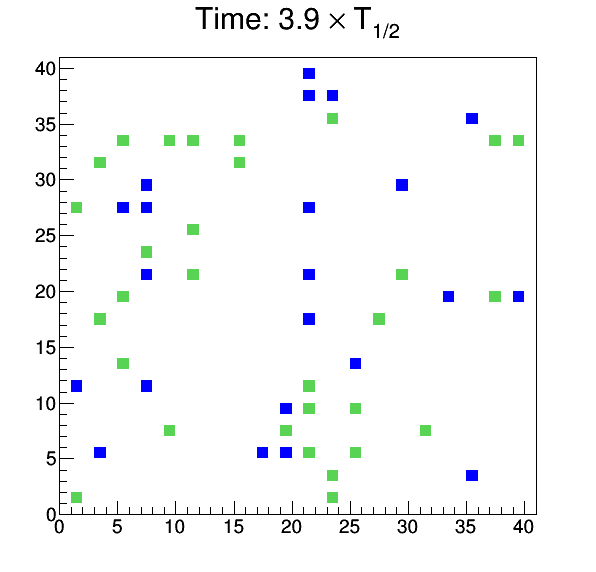

In [ ]:
 # 3. Create graphical area and draw initial state                                                                                                                                                                                           
c1 = ROOT.TCanvas("c1","Decay simulation",600,600)                                                                                                                                                                                            
h2.Draw("BOX")                                                                                                                                                                                                                                
h2_b.Draw("SAME BOX")    # h5                                                                                                                                                                                                                 
c1.SaveAs("decays2.gif") # h5                                                                                                                                                                                                                 
                                                                                                                                                                                                                                              
c1.Draw()

In [ ]:
  # 4. Calculate probability P for an atom to decay during dt (dt=0.1*T_{1/2})                                                                                                                                                                
dt = 0.1 # in units of T_{1/2} = 1                                                                                                                                                                                                            
P_a = (1 - math.exp(-math.log(2)*dt)) # quiz: what do you get with dt=1 ?                                                                                                                                                                     
P_b = (1 - math.exp(-math.log(2)*dt/0.5)) # h5                                                                                                                                                                                                
                                                                                                                                                                                                                                              
  # 5. Run simulation of decay up to Tmax                                                                                                                                                                                                     
Tmax = 3.9 # end time in units of T_{1/2}                                                                                                                                                                                                     
nsteps = int(Tmax / dt);                                                                                                                                                                                                                      
                                                                                                                                                                                                                                              
  # Create 1D histogram for logging the times of exponential decay                                                                                                                                                                            
hdecay_a = ROOT.TH1D("hdecay_a","Decay times;time [T_{1/2}];"                                                                                                                                                                                 
                            "Number of atoms decayed per 0.1#timesT_{1/2}",                                                                                                                                                                   
                            nsteps, 0., Tmax)                                                                                                                                                                                                 
hdecay_b = hdecay_a.Clone("hdecay_b") # h5                                                                                                                                                                                                    


In [ ]:
for it in range(1,nsteps+1):                                                                                                                                                                                                                  
  for ibinx in range(1,h2.GetNbinsX()+1):                                                                                                                                                                                                     
    for ibiny in range(1,h2.GetNbinsY()+1):                                                                                                                                                                                                   
                                                                                                                                                                                                                                              
      if (h2.GetBinContent(ibinx,ibiny)!=0 and ROOT.gRandom.Rndm()<P_a):                                                                                                                                                                      
                                                                                                                                                                                                                                              
        h2.SetBinContent(ibinx, ibiny, 0) # atom decayed! 1->0                                                                                                                                                                                
        h2_b.SetBinContent(ibinx, ibiny, 1) # h5: ...and became atom B                                                                                                                                                                        
        hdecay_a.Fill(it*dt)                                                                                                                                                                                                                  
                                                                                                                                                                                                                                              
        # h5: We can calculate atom B decays either before or after atom A                                                                                                                                                                    
        # h5: decays, which means results can differ for large dt, but                                                                                                                                                                        
        # h5: approach each other for infitesimally short dt                                                                                                                                                                                  
        # h5: We shall not deal with the correction terms here                                                                                                                                                                                
      if (h2_b.GetBinContent(ibinx,ibiny)!=0 and ROOT.gRandom.Rndm()<P_b):                                                                                                                                                                    
                                                                                                                                                                                                                                              
        h2_b.SetBinContent(ibinx, ibiny, 0)    # h5: atom decayed!                                                                                                                                                                            
        hdecay_b.Fill(it*dt)                   # h5                                                                                                                                                                                           
                                                                                                                                                                                                                                              
                                                                                                                                                                                                                                              
    # Set new time on title and redraw the grid of atoms                                                                                                                                                                                      
  h2.SetTitle(ROOT.Form("Time: "+ str(it*dt)+ " #times T_{1/2}"))                                                                                                                                                                             
  h2.Draw("BOX")                                                                                                                                                                                                                              
  h2_b.Draw("BOX SAME") # h5                                                                                                                                                                                                                  
                                                                                                                                                                                                                                              
    # Store result in animated gif file, with 50 ms delay                                                                                                                                                                                     
  c1.SaveAs("decays2.gif+50") # h5                                                                                                                                                                                                            
                                                                                                                                                                                                                                              
  # Fit exponential decay function to histogram                                                                                                                                                                                               
f1_a = ROOT.TF1("f1_a","[0]*(1-exp(-log(2)*0.1)) * exp(-log(2)/[1] * x)")                                                                                                                                                                     
f1_a.SetParameters(hdecay_a.GetBinContent(0), 1) # N0, T_{1/2}                                                                                                                                                                                
hdecay_a.Fit(f1_a);                                                                                                                                                                                                                           
                                                                                                                                                                                                                                              
  # Use shape of formula for N_B on slide 28 of l15-8.pdf           // h5                                                                                                                                                                     
  # Interpretation of the fit parameters is left to the reader      // h5                                                                                                                                                                     
f1_b = ROOT.TF1("f1_b","[0]*exp([1]*x) - [2]*exp([3]*x)")     # h5                                                                                                                                                                            
f1_b.SetParameters(80, -0.693, 80, -1.38)                        # h5                                                                                                                                                                         
f1_b.FixParameter(1, -0.693)                                     # h5                                                                                                                                                                         
f1_b.FixParameter(3, -1.38)                                      # h5                                                                                                                                                                         
f1_b.SetLineColor(1)                                      # h5                                                                                                                                                                                
hdecay_b.Fit(f1_b)                                               # h5                                                                                                                                                                         
                                                                                                                                                                                                                                              
hdecay_a.Draw()                                                                                                                                                                                                                               
hdecay_b.SetLineColor(1)   # h5                                                                                                                                                                                                               
hdecay_b.Draw("SAME")             # h5                                                                                                                                                                                                        
c1.SaveAs("decays2_expdecay.pdf") # h5                            

 FCN=52.8673 FROM MIGRAD    STATUS=CONVERGED     104 CALLS         105 TOTAL
                     EDM=1.55079e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.46765e+02   4.34737e+01   8.92563e-02   2.05987e-06
   2  p1           8.52067e-01   7.34227e-02   1.50608e-04   8.55281e-03
 FCN=24.64 FROM MIGRAD    STATUS=CONVERGED      32 CALLS          33 TOTAL
                     EDM=6.79598e-22    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.29277e+01   3.45045e+00   2.67454e-03   2.32461e-11
   2  p1          -6.93000e-01     fixed    
   3  p2           5.44996e+01   4.66141e+00   3.61318e-03  -2.21235e-11
   4  p3          -1.38000e+00     fixed    


Info in <TCanvas::Print>: pdf file decays2_expdecay.pdf has been created


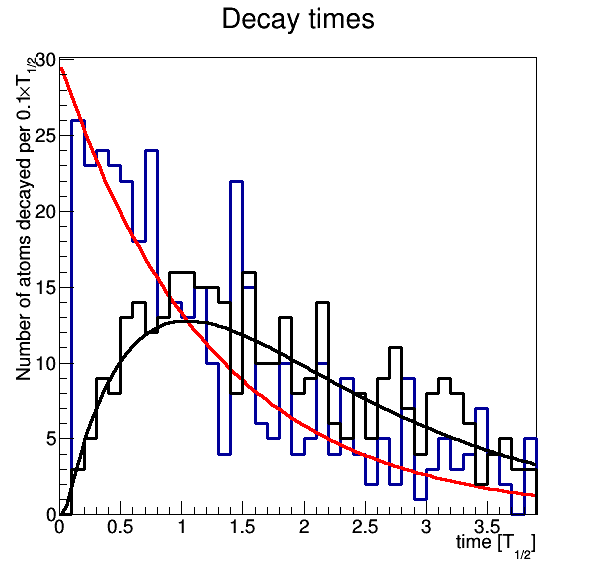

In [ ]:
c1.Draw()